# Classifier Decision Function

In [1]:
# dependances and data setup
%matplotlib ipympl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()

X, y = dataset.data, dataset.target

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)


In [2]:
# example logisticRegression classifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)

C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:

lr_decision = lr.decision_function(X_test) #return ndarray shape(n,)

y_score_list = list(zip(y_test[:20], lr_decision[:20]))

y_score_list

[(0, -29.828788044575575),
 (0, -19.382921795274804),
 (0, -29.198342702834346),
 (0, -21.746184572585864),
 (0, -22.642396110210083),
 (0, -11.806005473467984),
 (1, 6.496015738192873),
 (0, -23.3545679794339),
 (0, -27.543472521077),
 (0, -26.888218955282774),
 (0, -31.862716723790516),
 (0, -22.486126699111608),
 (0, -25.31800171178128),
 (0, -13.384559963914082),
 (0, -13.565611598212929),
 (0, -13.308399676584372),
 (1, 12.180793585932765),
 (0, -34.36248786817384),
 (0, -13.231506951819192),
 (0, -29.593938993387553)]

In [4]:
y_prob = lr .predict_proba(X_test)
y_prob_list = list(zip(y_test[:20], y_prob[:20]))
# probability of nagative (left) and posative (right)
y_prob_list

[(0, array([1.00000000e+00, 1.11050866e-13])),
 (0, array([9.99999996e-01, 3.82035763e-09])),
 (0, array([1.0000000e+00, 2.0860316e-13])),
 (0, array([1.00000000e+00, 3.59543993e-10])),
 (0, array([1.00000000e+00, 1.46734526e-10])),
 (0, array([9.9999254e-01, 7.4595689e-06])),
 (1, array([0.00150717, 0.99849283])),
 (0, array([1.00000000e+00, 7.19846669e-11])),
 (0, array([1.0000000e+00, 1.0914953e-12])),
 (0, array([1.0000000e+00, 2.1018169e-12])),
 (0, array([1.00000000e+00, 1.45277363e-14])),
 (0, array([1.00000000e+00, 1.71553371e-10])),
 (0, array([1.00000000e+00, 1.01048894e-11])),
 (0, array([9.99998461e-01, 1.53871716e-06])),
 (0, array([9.99998716e-01, 1.28389404e-06])),
 (0, array([9.99998340e-01, 1.66048416e-06])),
 (1, array([5.12798013e-06, 9.99994872e-01])),
 (0, array([1.00000000e+00, 1.19278216e-15])),
 (0, array([9.99998207e-01, 1.79320014e-06])),
 (0, array([1.00000000e+00, 1.40448012e-13]))]

# Precision Recall curves

C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


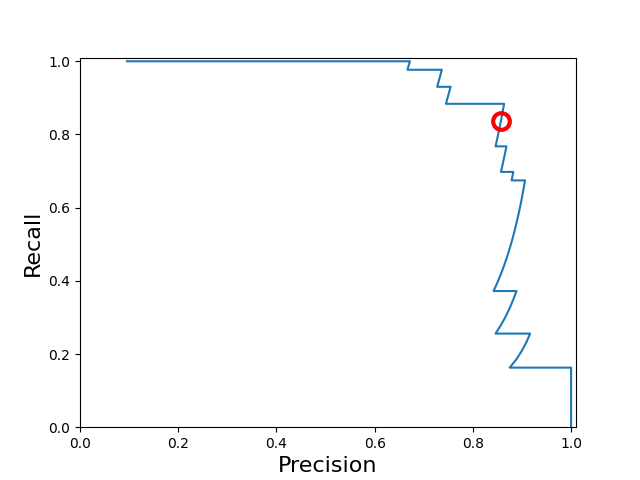

In [5]:
from sklearn.metrics import precision_recall_curve
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)


precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
# plt.axes().set_aspect('equal')
plt.show()


C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


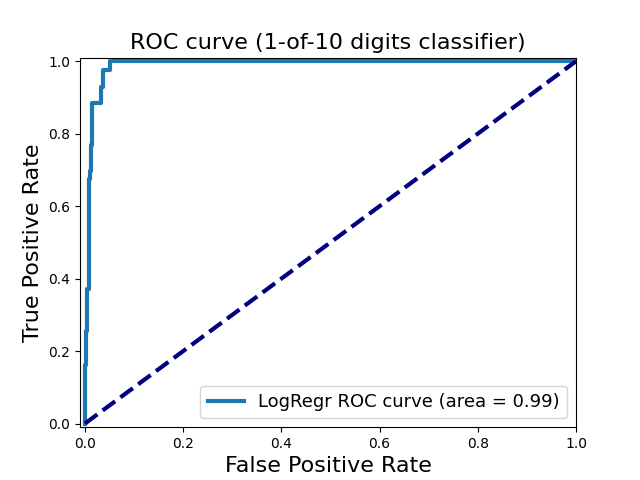

In [6]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
# plt.axes().set_aspect('equal')
plt.show()

In [7]:
from sklearn.svm import SVC

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


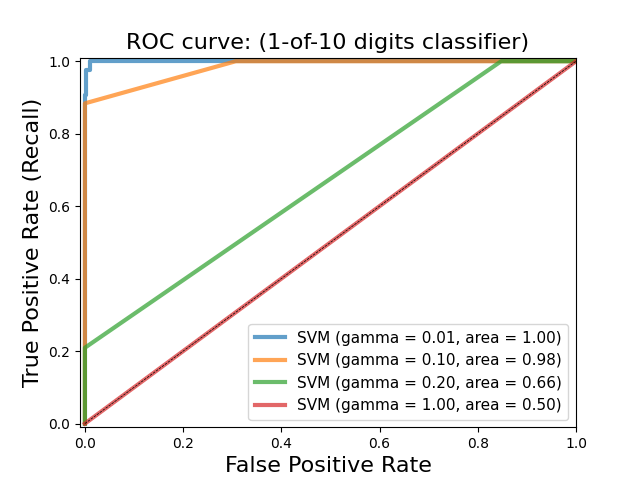

In [8]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
# plt.axes().set_aspect('equal')

plt.show()